# 01. Neural Network Regression with TensorFlow
There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.





For example, you might want to:


*   
Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
*   Predict the coordinates of a bounding box of an item in an image.

*   Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).



In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.


In [ ]:

X=tf.range(-100,100,4)
y=X+10

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

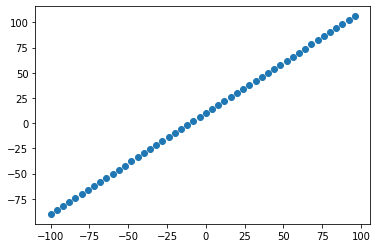

In [ ]:
plt.scatter(X,y)

# Creating data to view and fit
Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

In [ ]:
X_train=X[:40]
y_train=y[:40]

X_test=X[40:]
y_test=y[40:]

In [ ]:
X=X[...,tf.newaxis]

In [ ]:
y=y[...,tf.newaxis]

In [ ]:
X.ndim,y.ndim

(2, 2)

In [ ]:
tf.random.set_seed(42)

NameError: ignored

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
     tf.keras.layers.Dense(1,name="output_layer")
])

model.compile(loss="mae",optimizer="sgd",metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
2/2 [==============================] - 1s 7ms/step - loss: 36.0963 - mae: 36.0963
Epoch 2/20
2/2 [==============================] - 0s 12ms/step - loss: 28.7401 - mae: 28.7401
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 33.2070 - mae: 33.2070
Epoch 4/20
2/2 [==============================] - 0s 6ms/step - loss: 30.5341 - mae: 30.5341
Epoch 5/20
2/2 [==============================] - 0s 6ms/step - loss: 15.5504 - mae: 15.5504
Epoch 6/20
2/2 [==============================] - 0s 6ms/step - loss: 12.3355 - mae: 12.3355
Epoch 7/20
2/2 [==============================] - 0s 6ms/step - loss: 11.6147 - mae: 11.6147
Epoch 8/20
2/2 [==============================] - 0s 9ms/step - loss: 11.2547 - mae: 11.2547
Epoch 9/20
2/2 [==============================] - 0s 7ms/step - loss: 42.3778 - mae: 42.3778
Epoch 10/20
2/2 [==============================] - 0s 7ms/step - loss: 29.5266 - mae: 29.5266
Epoch 11/20
2/2 [==============================] - 0s 6ms/step - los

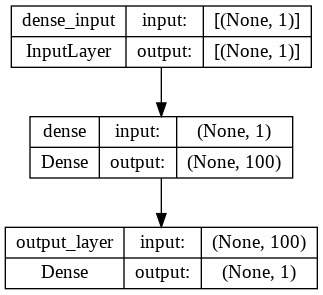

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
y_pred=model.predict(X_test)
y_pred

1/1 [==============================] - 0s 105ms/step


array([[ 72.80652 ],
       [ 77.63733 ],
       [ 82.46813 ],
       [ 87.29894 ],
       [ 92.129745],
       [ 96.960556],
       [101.79135 ],
       [106.622154],
       [111.452965],
       [116.283775]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  plt.scatter(test_data,predictions,c="r",label="Predicitions")
  plt.legend()

Ploting predicting and testing values on graphs

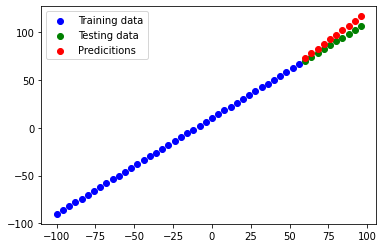

In [ ]:
plot_predictions()

Saving and re- loading  model and checking the parametrs

In [ ]:
model.save("best_model_save_format")

In [ ]:
model.save("best_model_save_format1.h5")

In [ ]:
loaded_SaveModel_format = tf.keras.models.load_model("best_model_save_format")
loaded_SaveModel_format.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from google.colab import files
import io
import pandas as pd


In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

Saving insurance.csv to insurance.csv


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

X=df.drop("charges",axis=1)
y=df["charges"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
ct.fit(X_train)

xtn=ct.transform(X_train)


In [ ]:
xten=ct.transform(X_test)

In [ ]:
X_train.shape

(1070, 6)

In [ ]:
xtn

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

In [ ]:
model.fit(xtn,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 3474.6943 - mae: 3474.6943
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 3473.6924 - mae: 3473.6924
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 3474.5054 - mae: 3474.5054
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 3474.2646 - mae: 3474.2646
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 3476.3660 - mae: 3476.3660
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 3473.9167 - mae: 3473.9167
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 3472.2983 - mae: 3472.2983
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 3472.9998 - mae: 3472.9998
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 3472.5928 - mae: 3472.5928
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3473.1057 - mae: 3473.1057

In [ ]:
model.evaluate(xten,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]